## ¡Bienvenid@s!. Ésta es nuestra segunda sesión práctica y espero que podamos  cuestionar y aportar con opiniones para lograr un verdadero aprendizaje.

## CASO PRÁCTICO: POLÍTICA SALARIAL DE UNA EMPRESA PERUANA DE MANUFACTURAS
El área de RRHH de la empresa MANUFACTURAS SA ha seleccionado aleatoriamente a 30 personas del área de producción (se encuentran personal operario, personal técnico, jefe de área, y supervisores)
Dicha área está buscando identificar la relación que existe entre el salario actual de su personal y otras características como la antigüedad de la persona en la empresa, la experiencia laboral en el área específica, entre otras.
Con los hallazgos, la gerencia general busca desarrollar una política de sueldos para sus nuevos colaboradores y desarrolar junto al área de RRHH una política de salarios según el puesto a contratar y según méritorcracia.
La cantidad de trabajadores del área de producción es de 280 personas, incluyendo a los operarios, supervisores, jefes y sub gerentes. La empresa cuenta con 320 empleados en total.

Luego de analizar la muestra inicial de 30 trabajadores del área de producción, se le ha contratado a usted para que confirme los resultados obtenidos o sugiera alguna mejora antes de llevar
dichos números a la junta de directorio con los inversionistas, donde se tomará la decisión de abrir una nueva planta de producción con una inversión de USD 200 millones, de los cuales el 35% representa el gasto en planilla para los primeros 12 meses de operación.

In [1]:

# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
# Cargar el archivo Excel desde tu computadora
uploaded = files.upload()

Saving DMC _DDS_S02_DATA_PYTHON.xlsx to DMC _DDS_S02_DATA_PYTHON.xlsx


In [3]:
# Leer el archivo Excel subido
df_employees = pd.read_excel(next(iter(uploaded.keys())), sheet_name='1ra_Muestra_empleados')

In [4]:
# Identificar los valores faltantes
print("Valores faltantes por columna:")
print(df_employees.isnull().sum())

Valores faltantes por columna:
ID              0
Y_SalMes        0
X1d_EstAnios    0
X2d_ExpLab      0
X3d_Edad        0
X4d_AntAnios    0
X1_EstAnios     3
X2_ExpLab       3
X3_Edad         6
X4_AntAnios     0
dtype: int64


In [5]:
# Imputación de valores faltantes
# Para variables numéricas, vamos a usar la media para imputar
df_employees['Y_SalMes'].fillna(df_employees['Y_SalMes'].mean(), inplace=True)
df_employees['X1_EstAnios'].fillna(df_employees['X1_EstAnios'].mean(), inplace=True)
df_employees['X2_ExpLab'].fillna(df_employees['X2_ExpLab'].mean(), inplace=True)
df_employees['X3_Edad'].fillna(df_employees['X3_Edad'].mean(), inplace=True)
df_employees['X4_AntAnios'].fillna(df_employees['X4_AntAnios'].mean(), inplace=True)

# Imprimir nuevamente para verificar si se han imputado correctamente los valores
print("Valores faltantes después de la imputación:")
print(df_employees.isnull().sum())

Valores faltantes después de la imputación:
ID              0
Y_SalMes        0
X1d_EstAnios    0
X2d_ExpLab      0
X3d_Edad        0
X4d_AntAnios    0
X1_EstAnios     0
X2_ExpLab       0
X3_Edad         0
X4_AntAnios     0
dtype: int64


/tmp/ipython-input-3902315709.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_employees['Y_SalMes'].fillna(df_employees['Y_SalMes'].mean(), inplace=True)
/tmp/ipython-input-3902315709.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [ ]:
# # También pudimos haber usado la Imputación de valores faltantes --> El método de imputación dependerá de varios aspectos:
# 1) tamaño de la muestra, variable objetivo (principal o secundaria?), tipo de variables (continua o discreta), cantidad de datos a imputar, correlación entre variables; entre otros aspectos.
# Para variables numéricas, usaremos interpolación donde sea posible
# df_employees['Y_SalMes'] = df_employees['Y_SalMes'].interpolate(method='linear')
# df_employees['X1_EstAnios'] = df_employees['X1_EstAnios'].interpolate(method='linear')
# df_employees['X2_ExpLab'] = df_employees['X2_ExpLab'].interpolate(method='linear')
# df_employees['X3_Edad'] = df_employees['X3_Edad'].interpolate(method='linear')
# df_employees['X4_AntAnios'] = df_employees['X4_AntAnios'].interpolate(method='linear')

In [6]:
# Análisis estadístico descriptivo (excluyendo la columna 'ID')
print(df_employees.drop('ID', axis=1).describe())

          Y_SalMes  X1d_EstAnios  X2d_ExpLab   X3d_Edad  X4d_AntAnios  \
count    30.000000     30.000000   30.000000  30.000000     30.000000   
mean   2838.644471     11.600000    6.266667  27.900000      3.900000   
std    1393.608139      2.847867    2.333169   4.670893      1.583318   
min    1000.000000      6.000000    2.000000  21.000000      1.000000   
25%    1612.500000     10.000000    5.000000  25.000000      3.000000   
50%    2714.322235     12.000000    6.000000  27.000000      4.000000   
75%    3500.000000     13.000000    8.000000  29.750000      5.000000   
max    6254.000000     17.000000   12.000000  40.000000      7.000000   

       X1_EstAnios  X2_ExpLab    X3_Edad  X4_AntAnios  
count    30.000000  30.000000  30.000000    30.000000  
mean     11.333333   6.296296  26.625000     3.900000  
std       2.559634   1.996805   6.761006     1.583318  
min       6.000000   3.000000   0.000000     1.000000  
25%      10.000000   5.000000  25.000000     3.000000  
50%   

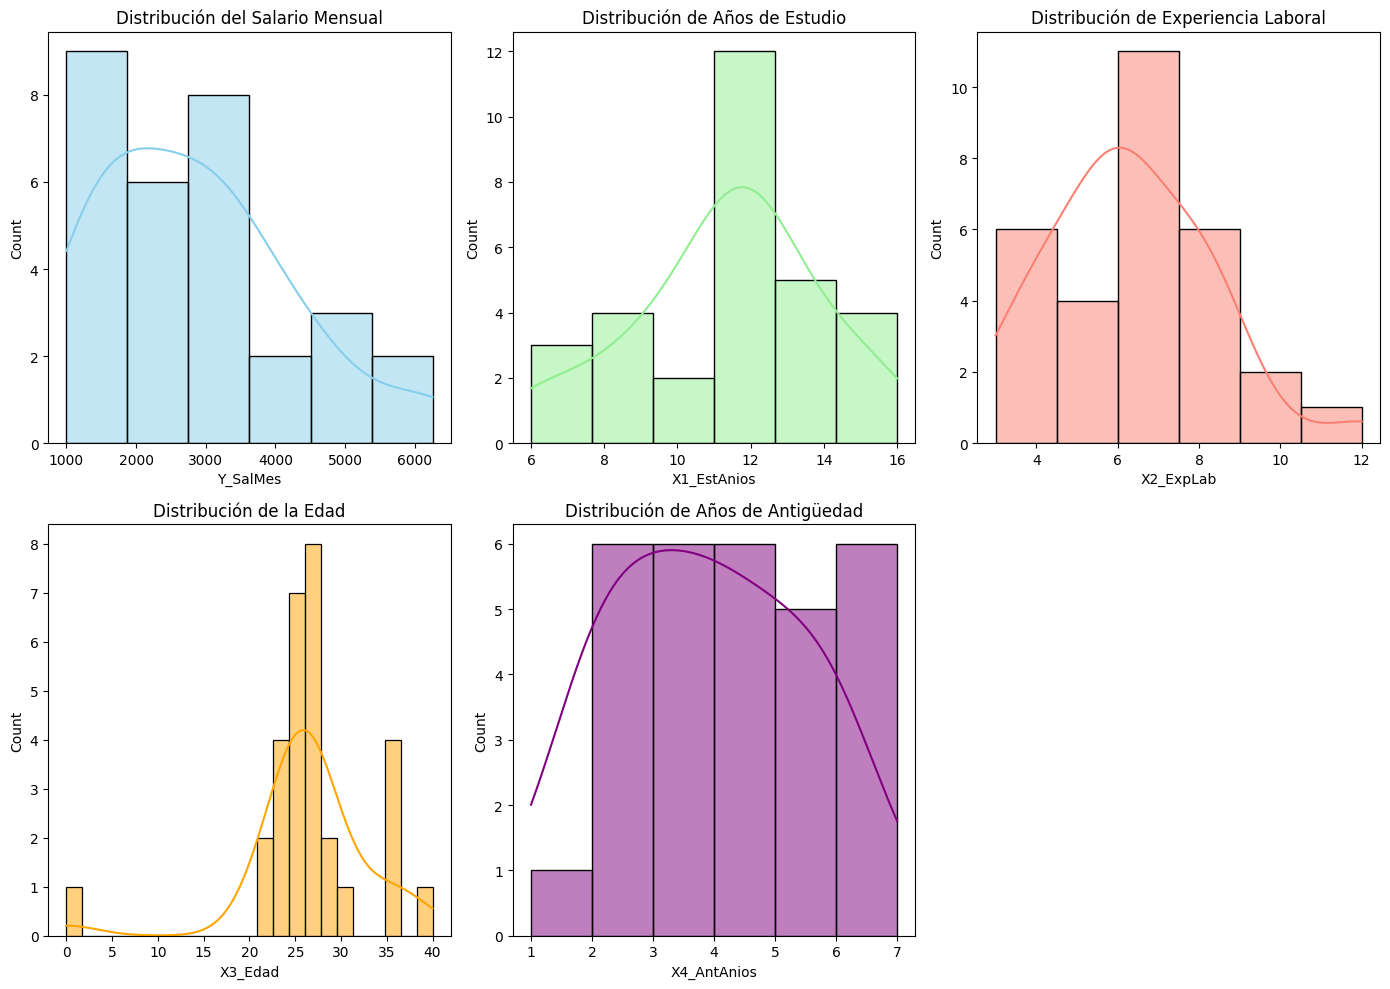

In [7]:
# Histogramas de las variables principales
plt.figure(figsize=(14, 10))
plt.subplot(2, 3, 1)
sns.histplot(df_employees['Y_SalMes'], kde=True, color='skyblue')
plt.title('Distribución del Salario Mensual')

plt.subplot(2, 3, 2)
sns.histplot(df_employees['X1_EstAnios'], kde=True, color='lightgreen')
plt.title('Distribución de Años de Estudio')

plt.subplot(2, 3, 3)
sns.histplot(df_employees['X2_ExpLab'], kde=True, color='salmon')
plt.title('Distribución de Experiencia Laboral')

plt.subplot(2, 3, 4)
sns.histplot(df_employees['X3_Edad'], kde=True, color='orange')
plt.title('Distribución de la Edad')

plt.subplot(2, 3, 5)
sns.histplot(df_employees['X4_AntAnios'], kde=True, color='purple')
plt.title('Distribución de Años de Antigüedad')

plt.tight_layout()
plt.show()

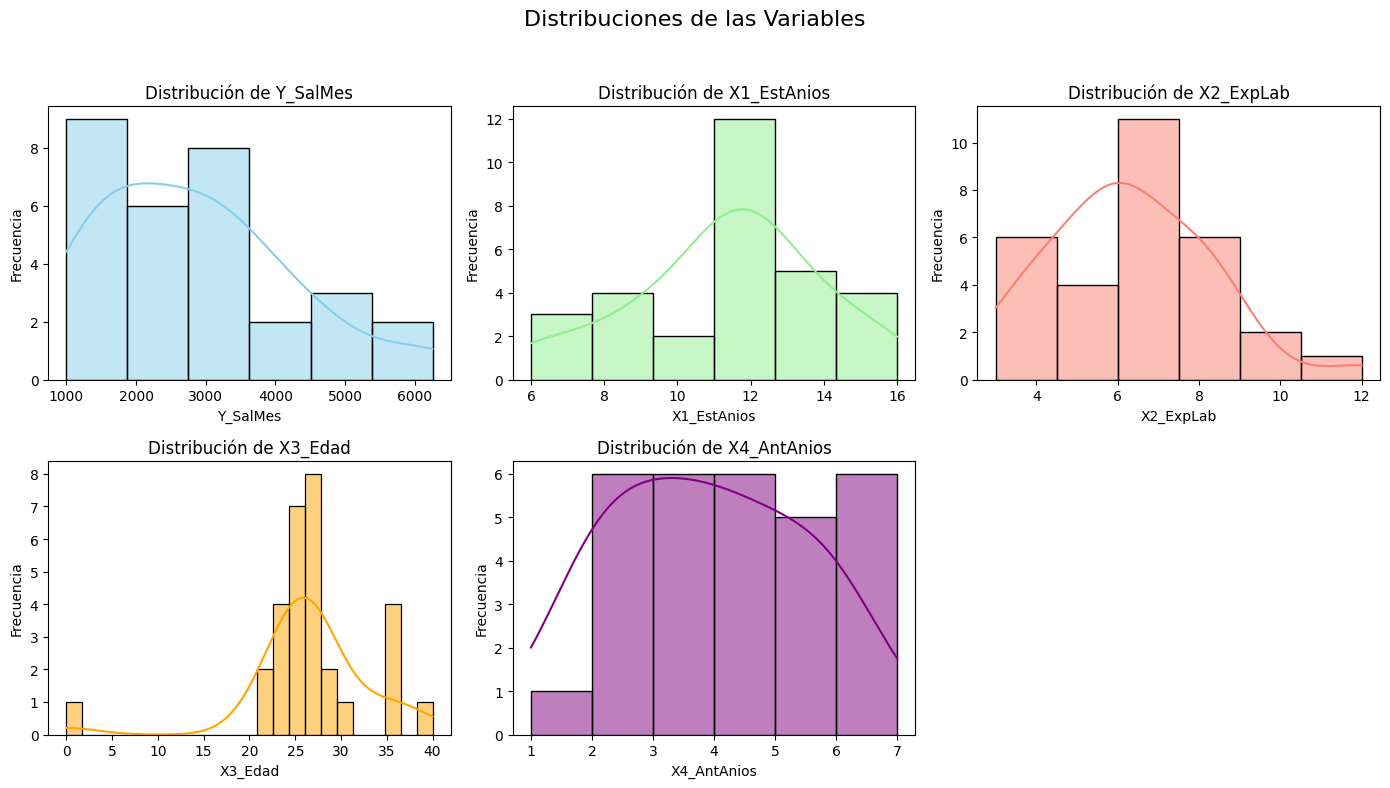

In [8]:
# Crear un gráfico de histogramas en una cuadrícula matricial con colores diferentes
variables = ['Y_SalMes', 'X1_EstAnios', 'X2_ExpLab', 'X3_Edad', 'X4_AntAnios']
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'purple']  # Colores diferentes para cada variable
fig, axes = plt.subplots(2, 3, figsize=(14, 8))  # 3 filas, 2 columnas
fig.suptitle('Distribuciones de las Variables', fontsize=16)

# Iterar sobre las variables, los ejes y los colores para generar los histogramas
for var, ax, color in zip(variables, axes.flatten(), colors):
    sns.histplot(df_employees[var], kde=True, ax=ax, color=color)
    ax.set_title(f'Distribución de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')

# Eliminar los ejes vacíos (si existen)
if len(variables) < len(axes.flatten()):
    for ax in axes.flatten()[len(variables):]:
        ax.remove()

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar el layout para no sobreponer títulos
plt.show()

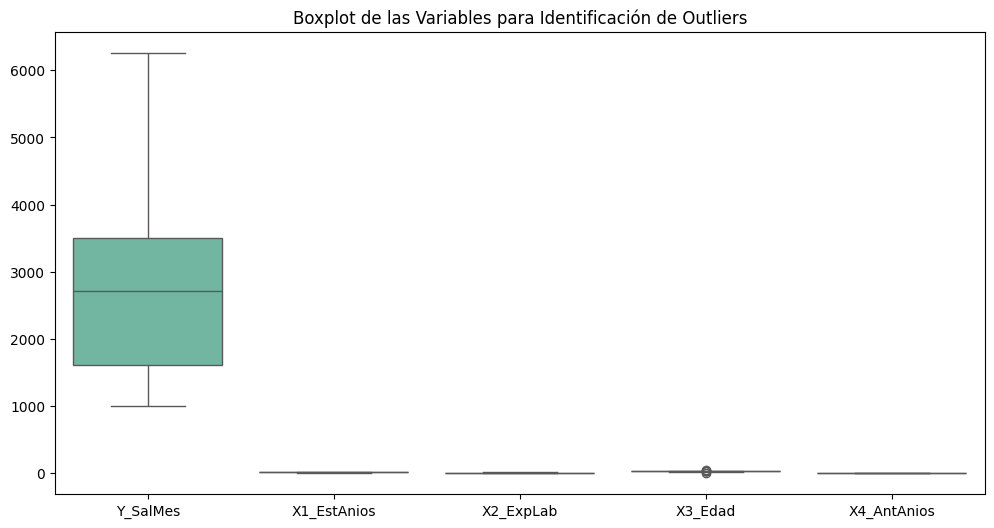

In [9]:
# Boxplot para identificar posibles outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_employees[['Y_SalMes', 'X1_EstAnios', 'X2_ExpLab', 'X3_Edad', 'X4_AntAnios']], palette="Set2")
plt.title('Boxplot de las Variables para Identificación de Outliers')
plt.show()

/tmp/ipython-input-1555700509.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_employees[var], palette="Set2", width=0.5)  # Reducir el ancho del boxplot
/tmp/ipython-input-1555700509.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_employees[var], palette="Set2", width=0.5)  # Reducir el ancho del boxplot
/tmp/ipython-input-1555700509.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_employees[var], palette="Set2", width=0.5)  # Reducir el ancho del boxplot
/tmp/ipython-input-1555700509.py:10: FutureWarning: 

Pass

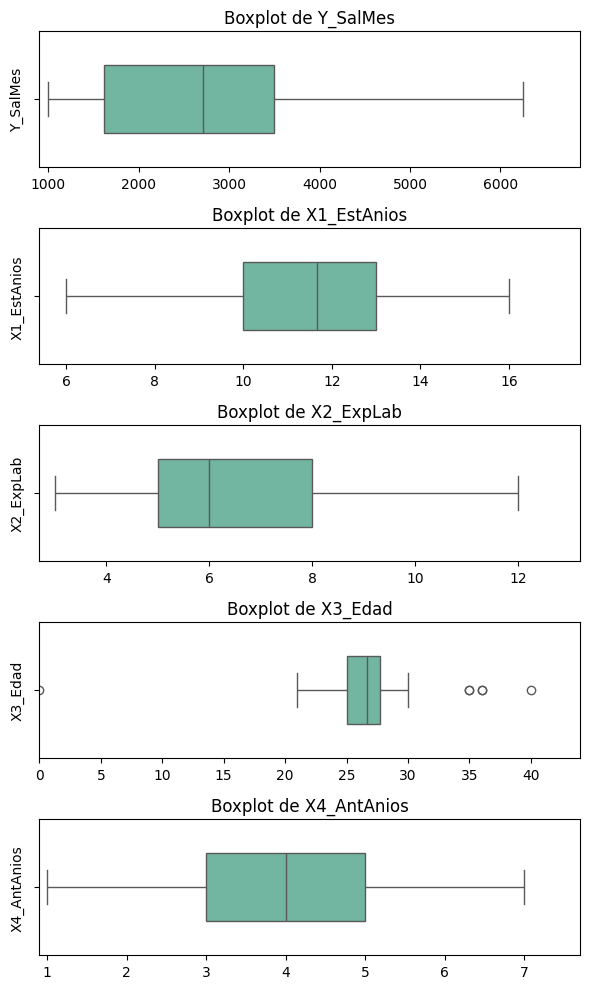

In [10]:
# Lista de variables a graficar
variables = ['Y_SalMes', 'X1_EstAnios', 'X2_ExpLab', 'X3_Edad', 'X4_AntAnios']

# Configurar el tamaño de la figura
plt.figure(figsize=(6, 10))  # Ajustar tamaño para una mejor visualización

# Crear un boxplot individual para cada variable
for i, var in enumerate(variables, 1):
    plt.subplot(len(variables), 1, i)  # Filas, columnas, índice
    sns.boxplot(x=df_employees[var], palette="Set2", width=0.5)  # Reducir el ancho del boxplot
    plt.title(f'Boxplot de {var}')
    plt.xlabel('')  # Ocultar el eje X para claridad
    plt.ylabel(var)
    plt.xlim(df_employees[var].min() * 0.9, df_employees[var].max() * 1.1)  # Ajustar eje X

plt.tight_layout()  # Ajustar espacios entre gráficos
plt.show()

In [11]:
# Cálculo del Rango Intercuartílico (IQR) para identificar outliers
Q1 = df_employees.quantile(0.25)
Q3 = df_employees.quantile(0.75)
IQR = Q3 - Q1
outliers = (df_employees < (Q1 - 1.5 * IQR)) | (df_employees > (Q3 + 1.5 * IQR))
# Mostrar los outliers identificados
print("Outliers detectados:\n", df_employees[outliers.any(axis=1)])

Outliers detectados:
     ID  Y_SalMes  X1d_EstAnios  X2d_ExpLab  X3d_Edad  X4d_AntAnios  \
2    2    1200.0             8           6        36             3   
9   14    2000.0            11           6        40             4   
21   5    3500.0            13           8        28             1   
24  22    4560.0            15           7        36             4   
27  19    6000.0            12          11        35             6   
28  24    6254.0            17           8        35             4   

    X1_EstAnios  X2_ExpLab  X3_Edad  X4_AntAnios  
2      8.000000   6.000000     36.0            3  
9     11.000000   6.000000     40.0            4  
21    13.000000   8.000000      0.0            1  
24    15.000000   7.000000     36.0            4  
27    12.000000   6.296296     35.0            6  
28    11.333333   8.000000     35.0            4  


# ¿Qué hace esta línea?

Evalúa si los valores de cada columna están por debajo de Q1 - 1.5 * IQR (muy bajos) o por encima de Q3 + 1.5 * IQR (muy altos).
El operador | (OR) se usa para capturar ambos extremos.
Esto genera una matriz booleana donde True indica valores atípicos.

# ¿Cómo interpreto esto?
Estos registros tienen valores fuera del rango intercuartílico permitido en al menos una de las variables analizadas.

In [12]:
# Cálculo del coeficiente de variación (CV)
cv = df_employees.std() / df_employees.mean()
print("\nCoeficiente de Variación (CV):\n", cv)


Coeficiente de Variación (CV):
 ID              0.567962
Y_SalMes        0.490941
X1d_EstAnios    0.245506
X2d_ExpLab      0.372314
X3d_Edad        0.167416
X4d_AntAnios    0.405979
X1_EstAnios     0.225850
X2_ExpLab       0.317140
X3_Edad         0.253935
X4_AntAnios     0.405979
dtype: float64


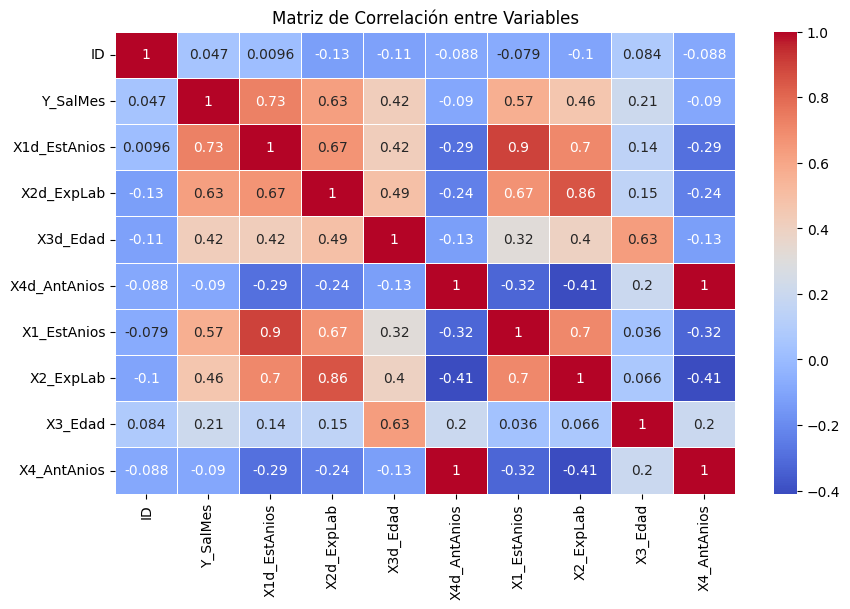

In [13]:
# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df_employees.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()

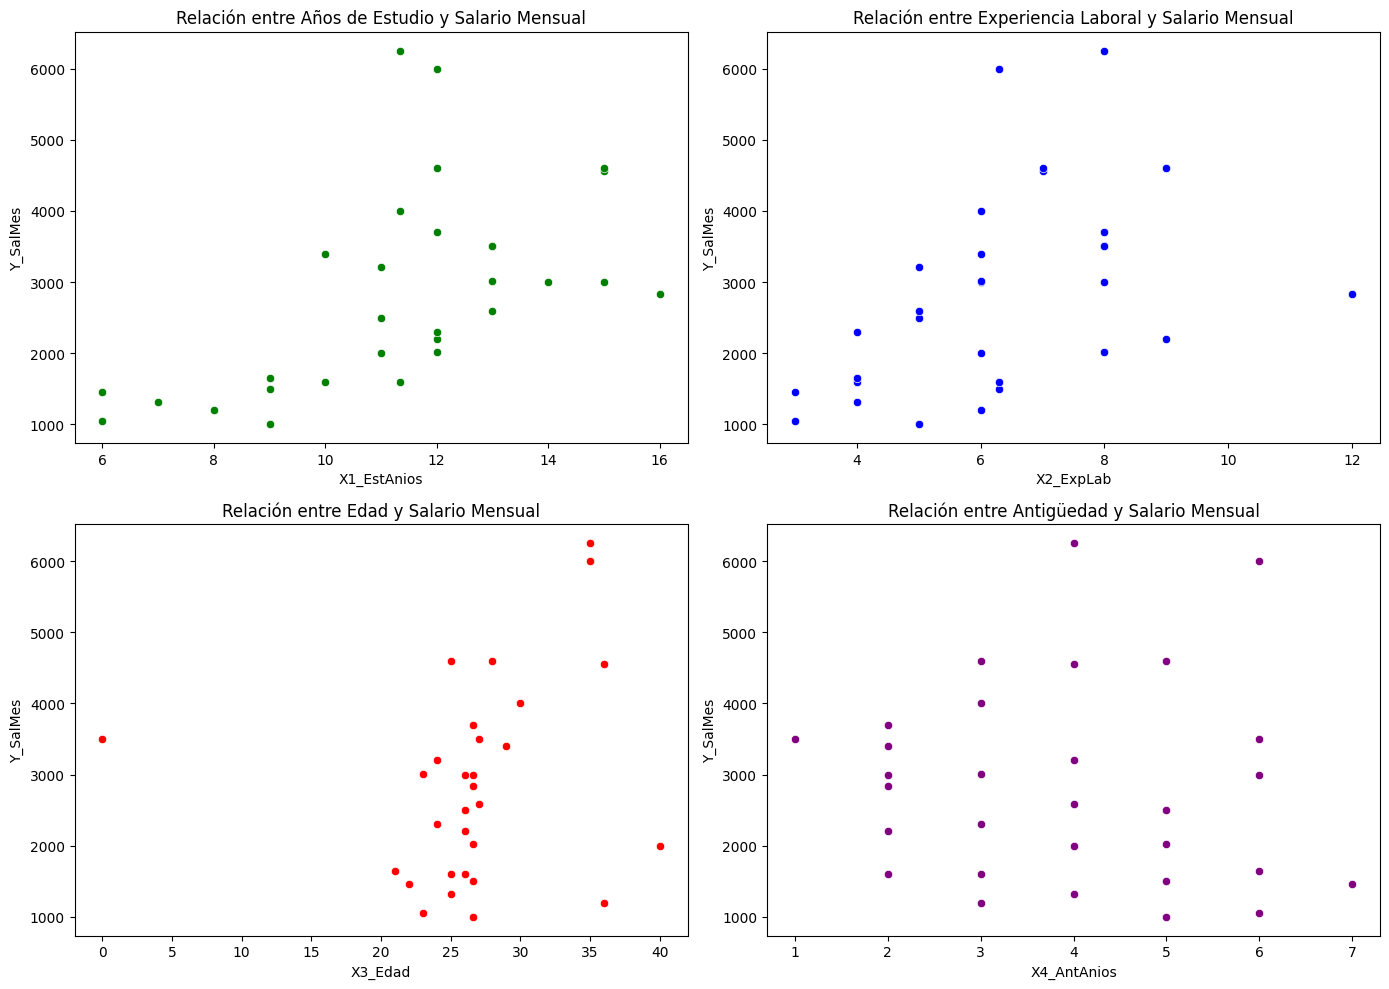

In [14]:
# Gráficos de dispersión
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x='X1_EstAnios', y='Y_SalMes', data=df_employees, color='green')
plt.title('Relación entre Años de Estudio y Salario Mensual')

plt.subplot(2, 2, 2)
sns.scatterplot(x='X2_ExpLab', y='Y_SalMes', data=df_employees, color='blue')
plt.title('Relación entre Experiencia Laboral y Salario Mensual')

plt.subplot(2, 2, 3)
sns.scatterplot(x='X3_Edad', y='Y_SalMes', data=df_employees, color='red')
plt.title('Relación entre Edad y Salario Mensual')

plt.subplot(2, 2, 4)
sns.scatterplot(x='X4_AntAnios', y='Y_SalMes', data=df_employees, color='purple')
plt.title('Relación entre Antigüedad y Salario Mensual')

plt.tight_layout()
plt.show()


In [ ]:
###################### EJERICICIO DE SEGUNDA PARTE ################


In [15]:
# Leer el archivo Excel subido
df_employees_2nd_sample = pd.read_excel(next(iter(uploaded.keys())), sheet_name='2da Muestra_56_empleados')

In [16]:
# Filtrar solo las columnas que nos interesan para el análisis
df_employees_2nd_sample = df_employees_2nd_sample[['Y_SalMes', 'X1_EstAnios', 'X2_ExpLab', 'X3_Edad', 'X4_AntAnios', 'X5_CargoRec']]


In [17]:
# Imputación de valores faltantes
# Para variables numéricas, vamos a usar la media para imputar
df_employees_2nd_sample['Y_SalMes'] = df_employees_2nd_sample['Y_SalMes'].fillna(df_employees_2nd_sample['Y_SalMes'].mean())
df_employees_2nd_sample['X1_EstAnios'] = df_employees_2nd_sample['X1_EstAnios'].fillna(df_employees_2nd_sample['X1_EstAnios'].mean())
df_employees_2nd_sample['X2_ExpLab'] = df_employees_2nd_sample['X2_ExpLab'].fillna(df_employees_2nd_sample['X2_ExpLab'].mean())
df_employees_2nd_sample['X3_Edad'] = df_employees_2nd_sample['X3_Edad'].fillna(df_employees_2nd_sample['X3_Edad'].mean())
df_employees_2nd_sample['X4_AntAnios'] = df_employees_2nd_sample['X4_AntAnios'].fillna(df_employees_2nd_sample['X4_AntAnios'].mean())
# For categorical variable 'X5_CargoRec', we can use the mode for imputation
df_employees_2nd_sample['X5_CargoRec'] = df_employees_2nd_sample['X5_CargoRec'].fillna(df_employees_2nd_sample['X5_CargoRec'].mode()[0])

# Imprimir nuevamente para verificar si se han imputado correctamente los valores
print("Valores faltantes después de la imputación:")
print(df_employees_2nd_sample.isnull().sum())

Valores faltantes después de la imputación:
Y_SalMes       0
X1_EstAnios    0
X2_ExpLab      0
X3_Edad        0
X4_AntAnios    0
X5_CargoRec    0
dtype: int64


In [ ]:
# Para variables numéricas, vamos a usar la MEDIANA, MODA,... para imputar


In [18]:
# Análisis estadístico descriptivo
print("Estadísticas descriptivas:")
print(df_employees_2nd_sample.describe())

Estadísticas descriptivas:
          Y_SalMes  X1_EstAnios  X2_ExpLab    X3_Edad  X4_AntAnios  \
count    56.000000    56.000000  56.000000  56.000000    56.000000   
mean   2248.892857    11.267857   5.607143  27.535714     5.553571   
std     730.109523     2.460533   1.754771   4.488224     2.897771   
min    1000.000000     6.000000   2.000000  21.000000     1.000000   
25%    1637.500000    10.000000   4.000000  25.000000     3.000000   
50%    2060.000000    11.000000   5.500000  27.000000     5.000000   
75%    3000.000000    13.000000   7.000000  29.000000     7.250000   
max    3800.000000    16.000000   9.000000  40.000000    13.000000   

       X5_CargoRec  
count    56.000000  
mean      1.357143  
std       0.483494  
min       1.000000  
25%       1.000000  
50%       1.000000  
75%       2.000000  
max       2.000000  


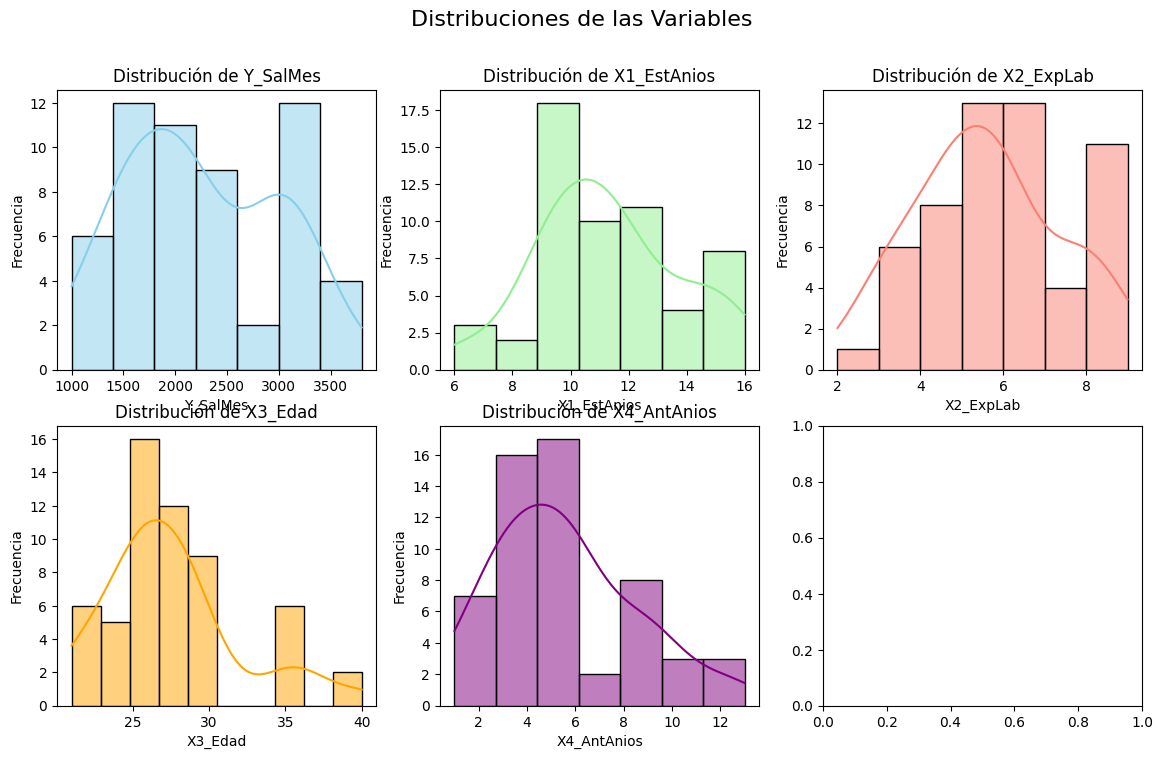

In [19]:
# Crear un gráfico de histogramas en una cuadrícula matricial con colores diferentes
variables = ['Y_SalMes', 'X1_EstAnios', 'X2_ExpLab', 'X3_Edad', 'X4_AntAnios']
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'purple']  # Colores diferentes para cada variable
fig, axes = plt.subplots(2, 3, figsize=(14, 8))  # 2 filas, 3 columnas
fig.suptitle('Distribuciones de las Variables', fontsize=16)

# Iterar sobre las variables, los ejes y los colores para generar los histogramas
for var, ax, color in zip(variables, axes.flatten(), colors):
    sns.histplot(df_employees_2nd_sample[var], kde=True, ax=ax, color=color)
    ax.set_title(f'Distribución de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')

In [20]:
# Eliminar los ejes vacíos (si existen)
if len(variables) < len(axes.flatten()):
    for ax in axes.flatten()[len(variables):]:
        ax.remove()

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar el layout para no sobreponer títulos
plt.show()

<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-3783993437.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=var, data=df_employees_2nd_sample, ax=ax, palette='Set3')
/tmp/ipython-input-3783993437.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=var, data=df_employees_2nd_sample, ax=ax, palette='Set3')
/tmp/ipython-input-3783993437.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=var, data=df_employees_2nd_sample, ax=ax, palette='Set3')
/tmp/ipython-input-3783993437.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

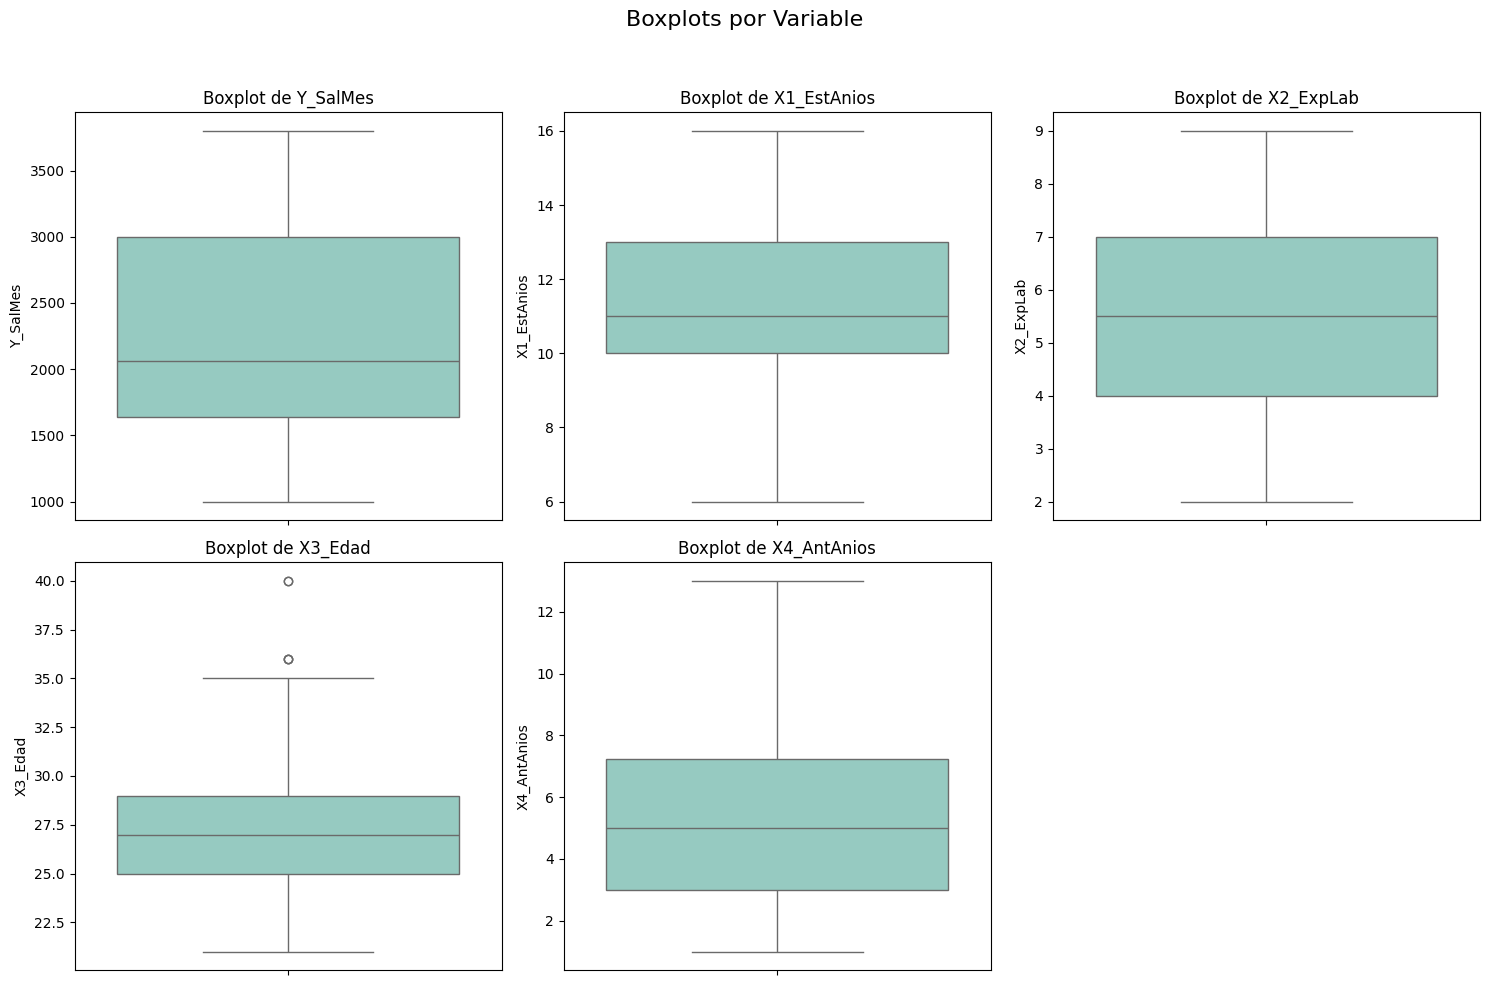

In [21]:
# Crear boxplots para cada variable por separado en modo matricial
variables = ['Y_SalMes', 'X1_EstAnios', 'X2_ExpLab', 'X3_Edad', 'X4_AntAnios']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 filas, 3 columnas
fig.suptitle('Boxplots por Variable', fontsize=16)

# Iterar sobre las variables para generar los boxplots
for var, ax in zip(variables, axes.flatten()):
    sns.boxplot(y=var, data=df_employees_2nd_sample, ax=ax, palette='Set3')
    ax.set_title(f'Boxplot de {var}')

# Eliminar los ejes vacíos (si existen)
if len(variables) < len(axes.flatten()):
    for ax in axes.flatten()[len(variables):]:
        ax.remove()

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar el layout para no sobreponer títulos
plt.show()

In [22]:
# Cálculo del Rango Intercuartílico (IQR) para identificar outliers
Q1 = df_employees_2nd_sample.quantile(0.25)
Q3 = df_employees_2nd_sample.quantile(0.75)
IQR = Q3 - Q1
outliers = (df_employees_2nd_sample < (Q1 - 1.5 * IQR)) | (df_employees_2nd_sample > (Q3 + 1.5 * IQR))

# Mostrar los outliers identificados
print("Outliers detectados:\n", df_employees_2nd_sample[outliers.any(axis=1)])

Outliers detectados:
     Y_SalMes  X1_EstAnios  X2_ExpLab  X3_Edad  X4_AntAnios  X5_CargoRec
1       1200            8          6       36            6            1
13      2000           11          6       40            9            1
17      2000           11          6       40            4            1
21      3800           16          7       36           10            2
34      3450           15          8       36           12            2


In [ ]:
# Cálculo del coeficiente de variación (CV)
cv = df_employees_2nd_sample.std() / df_employees_2nd_sample.mean()
print("\nCoeficiente de Variación (CV):\n", cv)

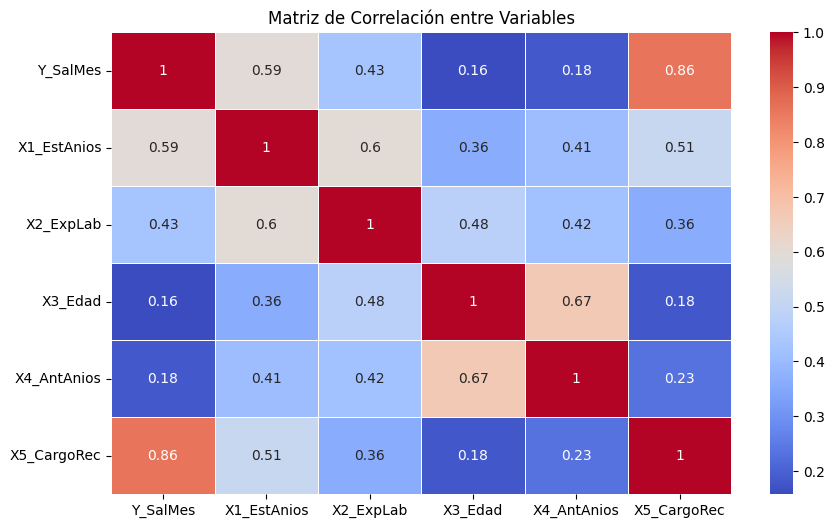

In [23]:
# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df_employees_2nd_sample.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()

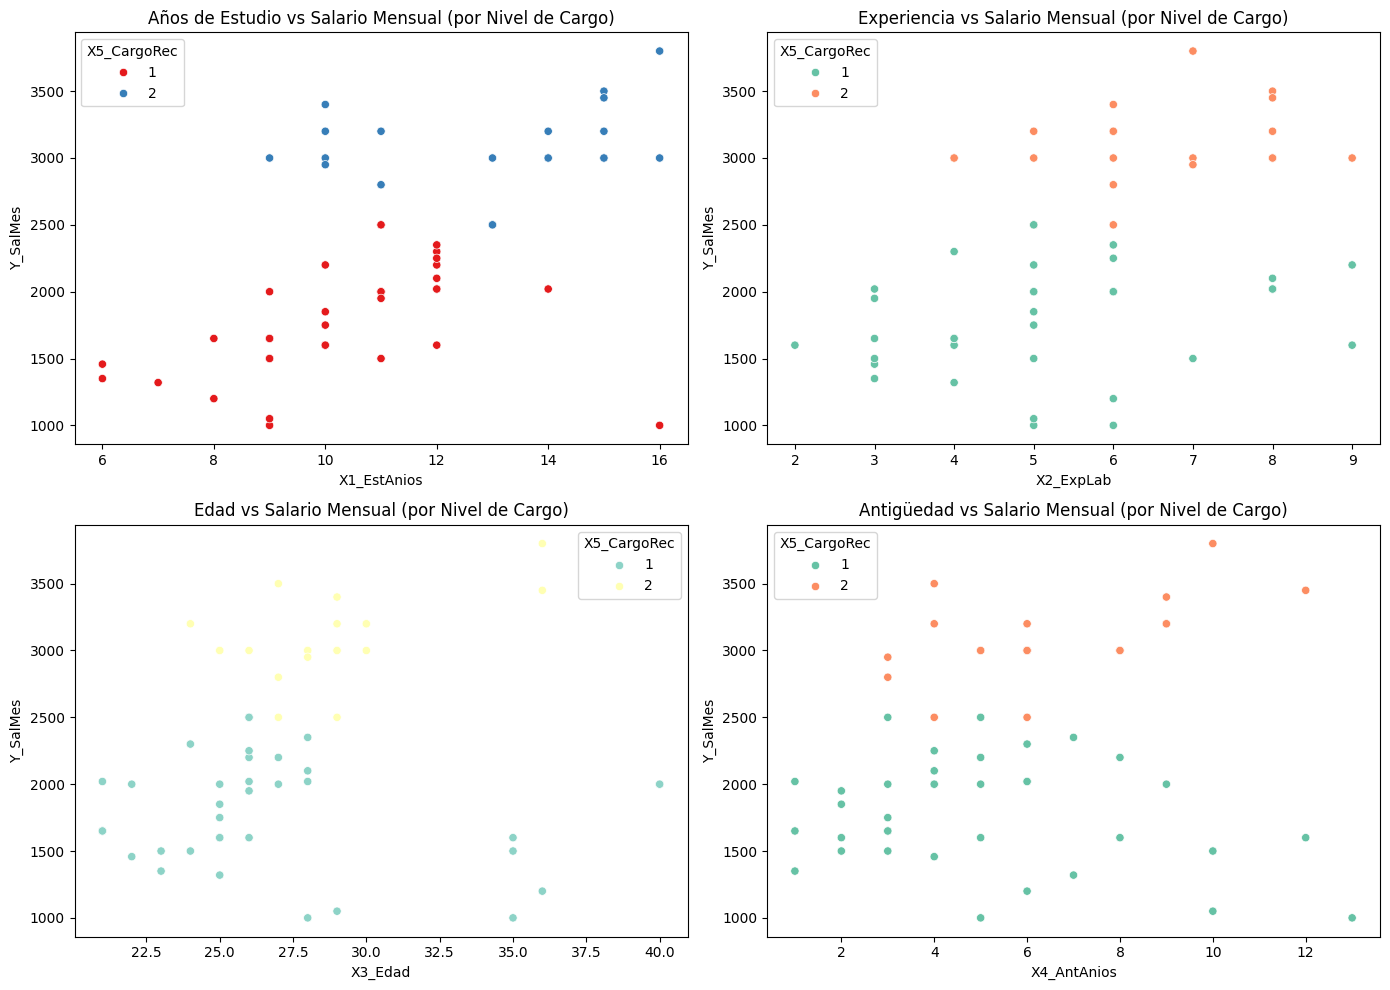

In [24]:
# Gráficos de dispersión considerando la variable X5_CargoRec (Nivel de Cargo)
plt.figure(figsize=(14, 10))

# Relación entre Años de Estudio y Salario Mensual, dividido por Nivel de Cargo
plt.subplot(2, 2, 1)
sns.scatterplot(x='X1_EstAnios', y='Y_SalMes', hue='X5_CargoRec', data=df_employees_2nd_sample, palette='Set1')
plt.title('Años de Estudio vs Salario Mensual (por Nivel de Cargo)')

# Relación entre Experiencia Laboral y Salario Mensual, dividido por Nivel de Cargo
plt.subplot(2, 2, 2)
sns.scatterplot(x='X2_ExpLab', y='Y_SalMes', hue='X5_CargoRec', data=df_employees_2nd_sample, palette='Set2')
plt.title('Experiencia vs Salario Mensual (por Nivel de Cargo)')

# Relación entre Edad y Salario, dividido por Nivel de Cargo
plt.subplot(2, 2, 3)
sns.scatterplot(x='X3_Edad', y='Y_SalMes', hue='X5_CargoRec', data=df_employees_2nd_sample, palette='Set3')
plt.title('Edad vs Salario Mensual (por Nivel de Cargo)')

# Relación entre Antigüedad y Salario, dividido por Nivel de Cargo
plt.subplot(2, 2, 4)
sns.scatterplot(x='X4_AntAnios', y='Y_SalMes', hue='X5_CargoRec', data=df_employees_2nd_sample, palette='Set2')
plt.title('Antigüedad vs Salario Mensual (por Nivel de Cargo)')

plt.tight_layout()
plt.show()

In [25]:
# Análisis adicional considerando la variable "X5_CargoRec" (Nivel de Cargo)
print("\nAnálisis por Nivel de Cargo (X5_CargoRec):\n")

# Descripción estadística por cada nivel de cargo (1: Operario, 2: Técnico)
for cargo_rec in df_employees_2nd_sample['X5_CargoRec'].unique():
    print(f"Estadísticas para el Nivel de Cargo {cargo_rec}:")
    print(df_employees_2nd_sample[df_employees_2nd_sample['X5_CargoRec'] == cargo_rec].describe())
    print("\n")

# Análisis de diferencias de salario entre los niveles de cargo
cargo_salary_mean = df_employees_2nd_sample.groupby('X5_CargoRec')['Y_SalMes'].mean()
print(f"Diferencias en el salario promedio por Nivel de Cargo:\n{cargo_salary_mean}")


Análisis por Nivel de Cargo (X5_CargoRec):

Estadísticas para el Nivel de Cargo 1:
          Y_SalMes  X1_EstAnios  X2_ExpLab    X3_Edad  X4_AntAnios  \
count    36.000000    36.000000  36.000000  36.000000    36.000000   
mean   1784.388889    10.333333   5.138889  26.944444     5.055556   
std     405.631450     2.028370   1.759103   5.053680     3.032627   
min    1000.000000     6.000000   2.000000  21.000000     1.000000   
25%    1500.000000     9.000000   4.000000  24.000000     3.000000   
50%    1800.000000    10.500000   5.000000  26.000000     4.500000   
75%    2020.000000    12.000000   6.000000  28.000000     6.250000   
max    2500.000000    16.000000   9.000000  40.000000    13.000000   

       X5_CargoRec  
count         36.0  
mean           1.0  
std            0.0  
min            1.0  
25%            1.0  
50%            1.0  
75%            1.0  
max            1.0  


Estadísticas para el Nivel de Cargo 2:
          Y_SalMes  X1_EstAnios  X2_ExpLab    X3_Edad  

# SESION 03
##*Ahora vamos a ver las distribuciones de cada una de nuestras variables, tanto discretas como continuas*##

In [26]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # Para las pruebas de normalidad
from google.colab import files

In [27]:
# Variables continuas y discretas
variables_continuas = ['Y_SalMes', 'X1_EstAnios', 'X2_ExpLab', 'X3_Edad', 'X4_AntAnios']  # Continuas
variables_discretas = ['X5_CargoRec']  # Discretas


In [28]:
# Análisis estadístico descriptivo
print("Estadísticas descriptivas:")
print(df_employees_2nd_sample.describe())

Estadísticas descriptivas:
          Y_SalMes  X1_EstAnios  X2_ExpLab    X3_Edad  X4_AntAnios  \
count    56.000000    56.000000  56.000000  56.000000    56.000000   
mean   2248.892857    11.267857   5.607143  27.535714     5.553571   
std     730.109523     2.460533   1.754771   4.488224     2.897771   
min    1000.000000     6.000000   2.000000  21.000000     1.000000   
25%    1637.500000    10.000000   4.000000  25.000000     3.000000   
50%    2060.000000    11.000000   5.500000  27.000000     5.000000   
75%    3000.000000    13.000000   7.000000  29.000000     7.250000   
max    3800.000000    16.000000   9.000000  40.000000    13.000000   

       X5_CargoRec  
count    56.000000  
mean      1.357143  
std       0.483494  
min       1.000000  
25%       1.000000  
50%       1.000000  
75%       2.000000  
max       2.000000  


Prueba de normalidad para Y_SalMes: estadístico=0.9548, p-valor=0.0349
Prueba de normalidad para X1_EstAnios: estadístico=0.9611, p-valor=0.0686
Prueba de normalidad para X2_ExpLab: estadístico=0.9505, p-valor=0.0224
Prueba de normalidad para X3_Edad: estadístico=0.8990, p-valor=0.0002
Prueba de normalidad para X4_AntAnios: estadístico=0.9502, p-valor=0.0218


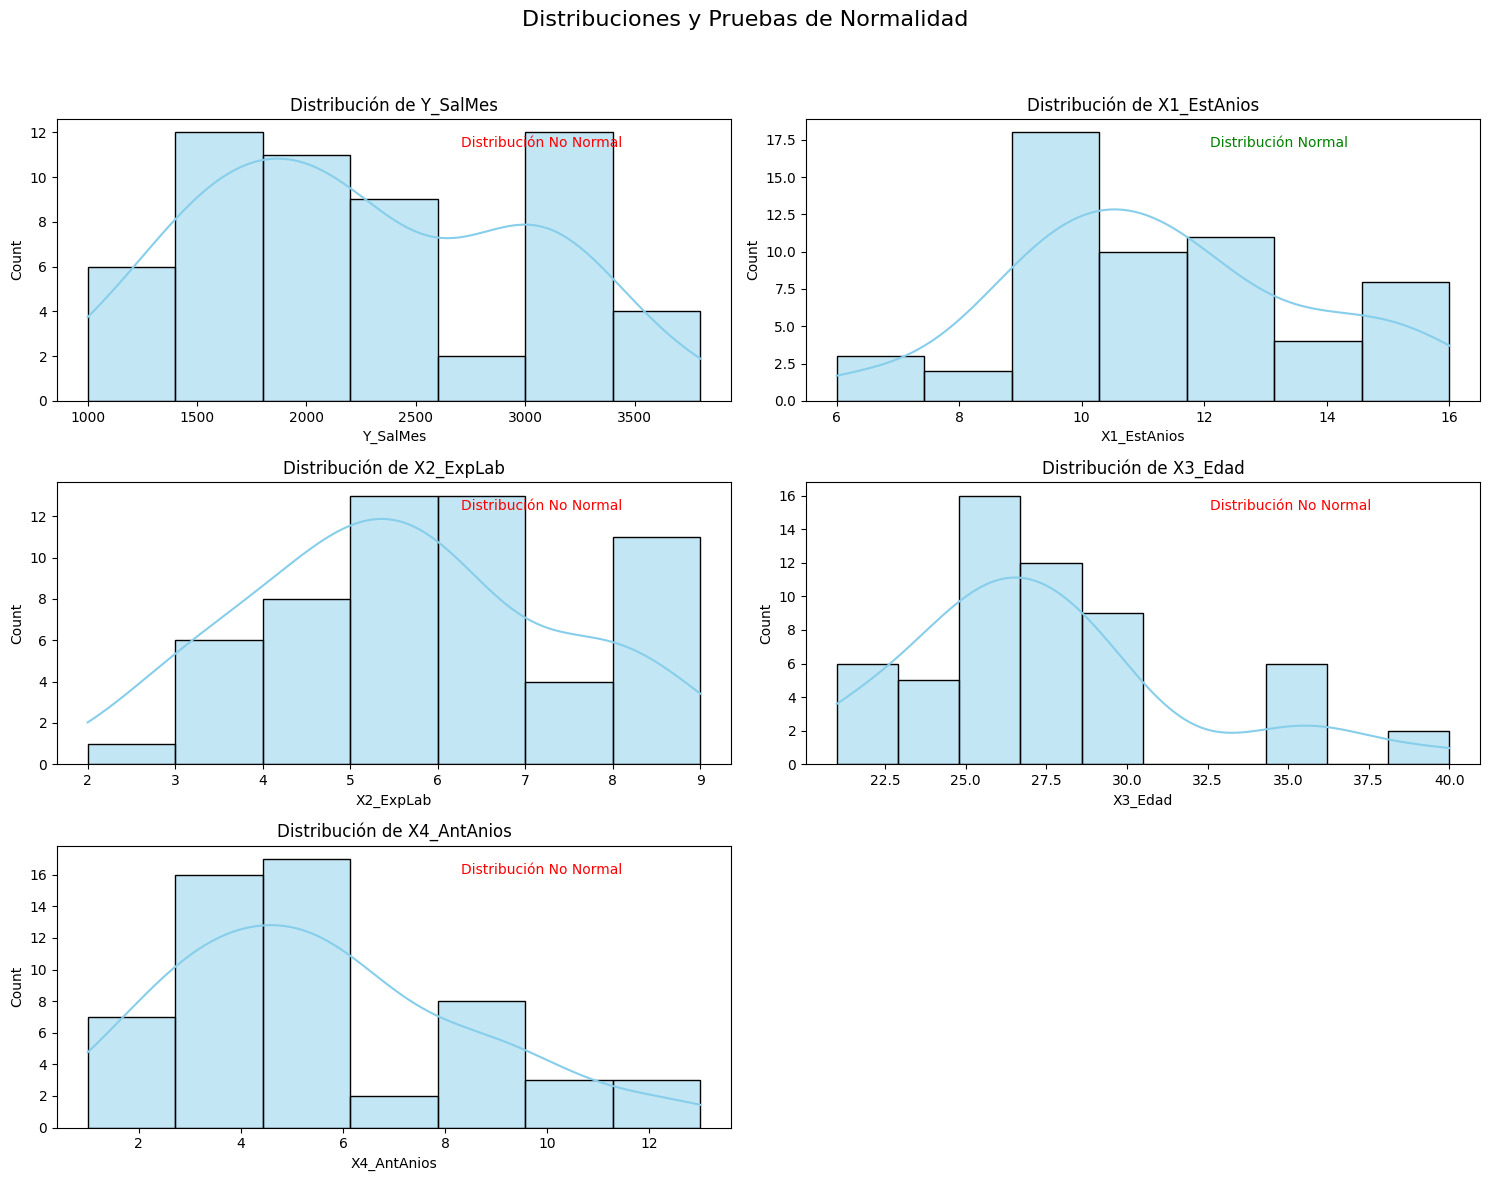

In [29]:
# Graficar histogramas y pruebas de normalidad para variables continuas
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Distribuciones y Pruebas de Normalidad', fontsize=16)

# Iterar sobre las variables continuas
for var, ax in zip(variables_continuas, axes.flatten()):
    # Histograma con KDE
    sns.histplot(df_employees_2nd_sample[var], kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Distribución de {var}')

    # Prueba de normalidad Shapiro-Wilk
    stat, p_value = stats.shapiro(df_employees_2nd_sample[var])
    print(f"Prueba de normalidad para {var}: estadístico={stat:.4f}, p-valor={p_value:.4f}")

    # Determinar si es normal o no
    if p_value > 0.05:
        ax.text(0.6, 0.9, 'Distribución Normal', transform=ax.transAxes, color='green')
    else:
        ax.text(0.6, 0.9, 'Distribución No Normal', transform=ax.transAxes, color='red')
# Eliminar los ejes vacíos (si existen)
if len(variables_continuas) < len(axes.flatten()):
    for ax in axes.flatten()[len(variables_continuas):]:
        ax.remove()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/tmp/ipython-input-1760074530.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='X5_CargoRec', data=df_employees_2nd_sample, palette='Set2')


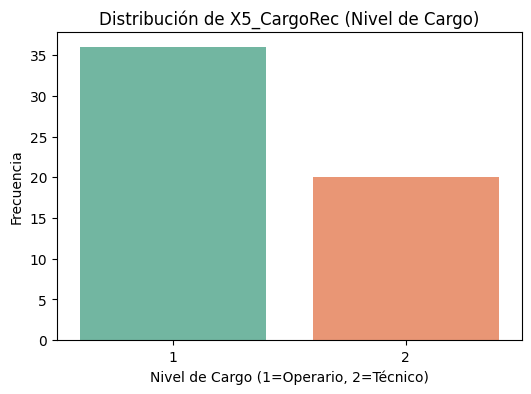

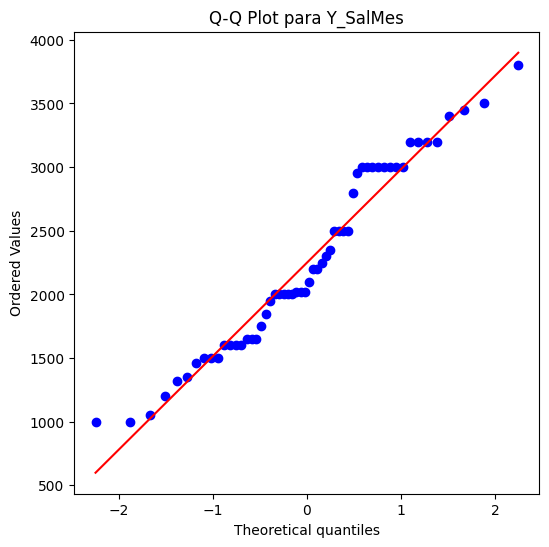

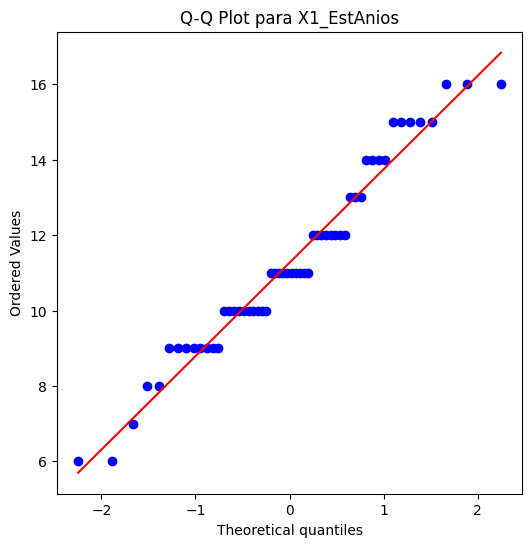

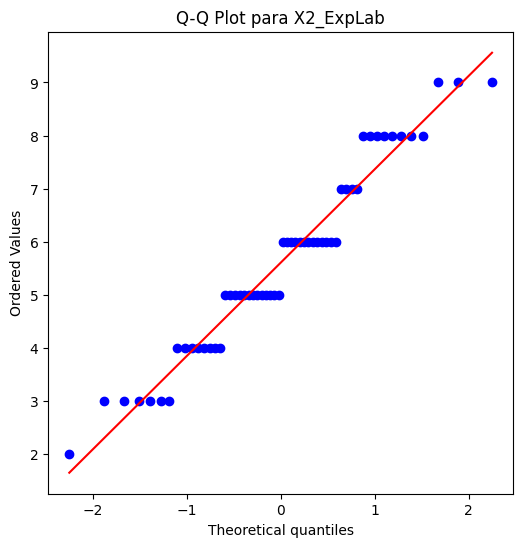

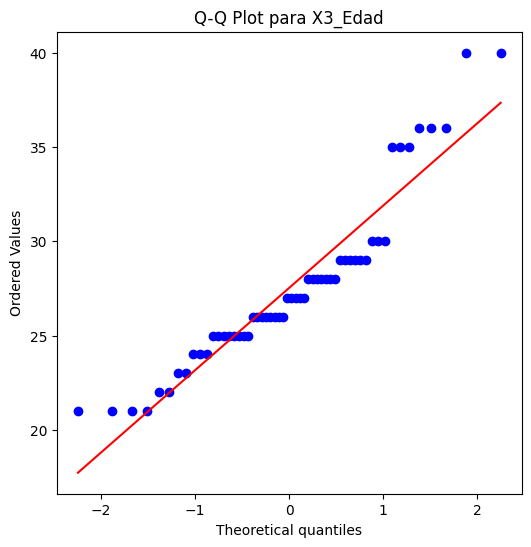

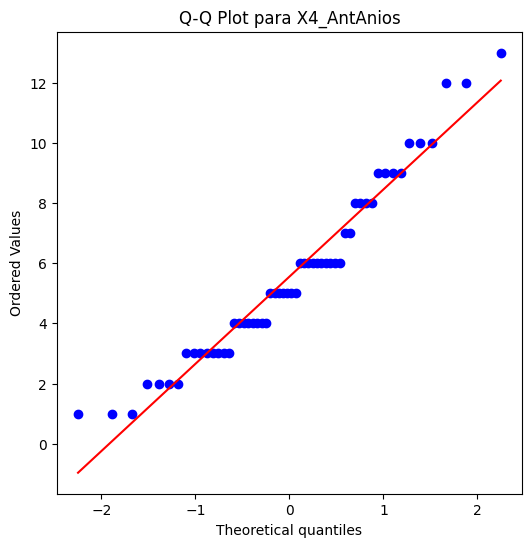

In [30]:
# Graficar la variable discreta X5_CargoRec
plt.figure(figsize=(6, 4))
sns.countplot(x='X5_CargoRec', data=df_employees_2nd_sample, palette='Set2')
plt.title('Distribución de X5_CargoRec (Nivel de Cargo)')
plt.xlabel('Nivel de Cargo (1=Operario, 2=Técnico)')
plt.ylabel('Frecuencia')
plt.show()

# Prueba adicional de normalidad para todas las variables con Q-Q plot
for var in variables_continuas:
    plt.figure(figsize=(6, 6))
    stats.probplot(df_employees_2nd_sample[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot para {var}')
    plt.show()

In [ ]:
Los gráficos Q-Q plot (Quantile-Quantile plot) mostrados comparan la distribución de cada una de las variables continuas (`Y_SalMes`, `X1_EstAnios`, `X2_ExpLab`, `X3_Edad`, `X4_AntAnios`) con una distribución normal teórica. La interpretación de un Q-Q plot es la siguiente:

1.  **Línea Recta Diagonal:** Si los puntos en el gráfico se alinean estrechamente a lo largo de la línea recta diagonal, sugiere que la distribución de la variable es similar a la distribución normal.

2.  **Desviaciones de la Línea:**
    *   **Puntos por encima de la línea en los extremos:** Indica que la distribución tiene "colas más pesadas" que la distribución normal (más valores extremos de lo esperado).
    *   **Puntos por debajo de la línea en los extremos:** Indica que la distribución tiene "colas más ligeras" que la distribución normal (menos valores extremos de lo esperado).
    *   **Curvatura:** Una curvatura en los puntos sugiere que la distribución está sesgada. Si la curva está hacia arriba en la parte superior, puede indicar un sesgo positivo. Si la curva está hacia abajo en la parte superior, puede indicar un sesgo negativo.

Basado en los Q-Q plots generados para las variables `Y_SalMes`, `X1_EstAnios`, `X2_ExpLab`, `X3_Edad`, y `X4_AntAnios`, se puede inferir lo siguiente sobre la normalidad de cada variable:

*   **Y_SalMes (Salario Mensual):** Observa si los puntos se desvían significativamente de la línea. Si hay desviación, especialmente en los extremos, sugiere que el salario mensual no sigue una distribución perfectamente normal. Puede haber sesgo o presencia de valores atípicos.

*   **X1_EstAnios (Años de Estudio):** Examina si los puntos se ajustan bien a la línea. Es común que variables como años de estudio tengan una distribución con un número limitado de valores posibles, lo que podría hacer que el Q-Q plot muestre "escalones" o agrupaciones en lugar de una línea continua. La cercanía general a la línea indica cuán cerca está de la normalidad.

*   **X2_ExpLab (Experiencia Laboral):** De manera similar a los años de estudio, verifica la alineación de los puntos con la línea. Desviaciones pueden indicar sesgo o una distribución no simétrica de la experiencia laboral.

*   **X3_Edad (Edad):** Analiza si los puntos siguen la línea recta. Las desviaciones en los extremos pueden sugerir la presencia de empleados particularmente jóvenes o mayores que se desvían del patrón normal.

*   **X4_AntAnios (Años de Antigüedad):** Observa el ajuste de los puntos a la línea. Si la mayoría de los puntos se agrupan cerca del inicio o final de la línea, y pocos se extienden a lo largo de ella, podría indicar una distribución no normal, posiblemente sesgada.

En resumen, los Q-Q plots te permiten visualizar si los datos de cada variable siguen aproximadamente una distribución normal. Si los puntos se desvían considerablemente de la línea recta, es una indicación visual de que la variable no está distribuida normalmente. Esto es útil para confirmar o complementar los resultados de las pruebas de normalidad (como Shapiro-Wilk) que se realizaron previamente.

## ¿Conclusiones?